# Задание

Лабораторная работа № 1
«Проверка гипотезы о законе распределения генеральной совокупности»
В результате опыта была получена выборочная совокупность.
Задание:
1. Составить вариационный ряд.
2. Построить интервальный статистический ряд.
3. По сгруппированным данным построить полигон относительных частот, гистограмму относительных частот,
4. Построить график эмпирической функции распределения.
5. Найти числовые характеристики выборки: выборочное среднее, исправленную выборочную дисперсию, моду, медиану, эксцесс, асимметрию.
6. По виду гистограммы и эмпирической функции распределения выборки выдвинуть гипотезу о распределении генеральной совокупности.
7. Найти оценки параметров предполагаемого распределения генеральной совокупности.
8. Построить на чертеже гистограммы и эмпирической функции её теоретические аналоги f(x) и F(x).
9. Проверить выполнение правила «трех сигма».
10. Применить критерий согласия Пирсона принять или опровергнуть выдвинутую гипотезу о распределении генеральной совокупности.
11. Найти доверительные интервалы для генеральной средней и генерального среднеквадратического отклонения по уровню надежности γ = 0,95.

In [14]:
# Необходимые библиотеки

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import norm, chi2

In [15]:
# Список значений

list = np.array([41.7, 36.7, 45.6, 31.0, 38.9, 28.3, 23.7, 54.5, 31.6, 26.1, 50.4, 45.0, 53.5, 50.1, 29.7, 40.9, 32.4, 45.0, 35.6, 25.6, 55.3, 33.1, 25.6, 40.2, 32.2, 43.2, 25.1, 29.9, 52.7, 18.6, 35.3, 38.1, 29.4, 32.1, 43.0, 23.0, 34.1, 28.8, 31.6, 40.8, 32.7, 43.0, 41.7, 41.7, 28.3, 23.1, 18.2, 23.5, 30.3, 36.2, 34.9, 41.0, 54.3, 33.3, 39.3, 12.8, 20.6, 22.6, 26.1, 16.8])

In [16]:
# Пункт 1. Вариационный ряд

variation_list = np.sort(list)
print(*variation_list, sep=', ')

12.8, 16.8, 18.2, 18.6, 20.6, 22.6, 23.0, 23.1, 23.5, 23.7, 25.1, 25.6, 25.6, 26.1, 26.1, 28.3, 28.3, 28.8, 29.4, 29.7, 29.9, 30.3, 31.0, 31.6, 31.6, 32.1, 32.2, 32.4, 32.7, 33.1, 33.3, 34.1, 34.9, 35.3, 35.6, 36.2, 36.7, 38.1, 38.9, 39.3, 40.2, 40.8, 40.9, 41.0, 41.7, 41.7, 41.7, 43.0, 43.0, 43.2, 45.0, 45.0, 45.6, 50.1, 50.4, 52.7, 53.5, 54.3, 54.5, 55.3


In [17]:
# Пункт 2. Интервальный статистический ряд

n = len(variation_list) # Количество элементов
k = int(np.ceil(1 + 3.322 * np.log10(n)))  # Вычисления количества интервалов при помощи формулы Стерджеса

x_max = max(variation_list)
x_min = min(variation_list)

h = (x_max - x_min) / k

x_0 = x_min - h/2

bin_edges = [x_0 + i * h for i in range(k+1)]
bin_edges[-1] += h

frequencies, _ = np.histogram(variation_list, bins=bin_edges) 

relative_frequencies = frequencies / n

interval_labels = [f"({round(bin_edges[i], 2)}, {round(bin_edges[i+1], 2)}]" for i in range(k)]
bin_edges = np.array(bin_edges)

interval_data = [
    {"Интервал": interval_labels[i], "Частота": frequencies[i], "Относительная частота": relative_frequencies[i]}
    for i in range(k)
]

interval_df = pd.DataFrame(interval_data)
interval_df

,Интервал,Частота,Относительная частота
0,"(9.76, 15.84]",1,0.016667
1,"(15.84, 21.91]",4,0.066667
2,"(21.91, 27.98]",10,0.166667
3,"(27.98, 34.05]",16,0.266667
4,"(34.05, 40.12]",9,0.150000
5,"(40.12, 46.19]",13,0.216667
6,"(46.19, 58.34]",7,0.116667


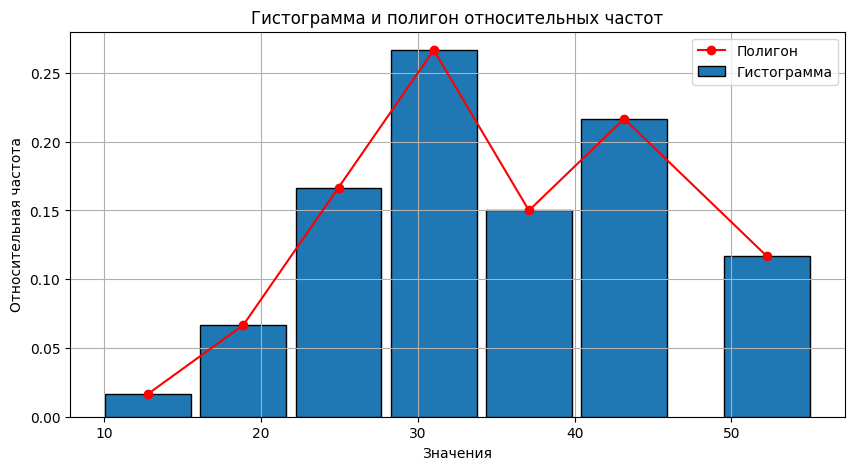

In [18]:
# Пункт 3. Полигон и гистограмма относительных частот

bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:]) # Центры интервалов (для полигона)

plt.figure(figsize=(10, 5))

plt.bar(bin_centers, relative_frequencies, width=(bin_edges[1] - bin_edges[0]) * 0.9,
        align='center', edgecolor='black', label='Гистограмма')

plt.plot(bin_centers, relative_frequencies, marker='o', color='red', linestyle='-', label='Полигон')

plt.title('Гистограмма и полигон относительных частот')
plt.xlabel('Значения')
plt.ylabel('Относительная частота')
plt.grid(True)
plt.legend()
plt.show()


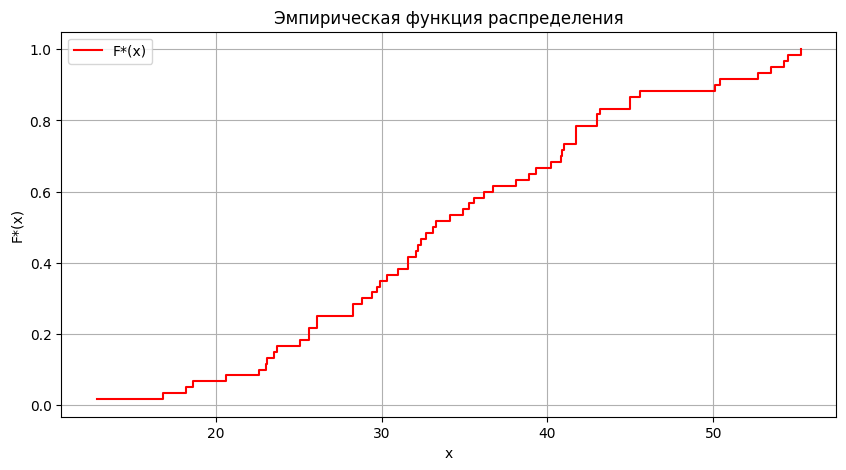

In [19]:
# Пункт 4. График эмпирической функции распределения

empirical_cdf = np.arange(1, n + 1) / n  # F*(x) = i / n

plt.figure(figsize=(10, 5))
plt.step(variation_list, empirical_cdf, where='post', label='F*(x)', color='red')
plt.title('Эмпирическая функция распределения')
plt.xlabel('x')
plt.ylabel('F*(x)')
plt.grid(True)
plt.legend()
plt.show()

In [20]:
# Пункт 5. Числовые характеристики выборки

mean = np.mean(variation_list) # Выборочное среднее
variance = np.var(variation_list, ddof=1) # Исправленная выборочная дисперсия
std = np.sqrt(variance) # Стандартное отклонение
median = np.median(variation_list)
mode = stats.mode(variation_list).mode
kurtosis = stats.kurtosis(variation_list)
skewness = stats.skew(variation_list)

characteristics = {
    "Выборочное среднее": mean,
    "Исправленная выборочная дисперсия": variance,
    "Стандартное отклонение": std,
    "Медиана": median,
    "Мода": mode,
    "Коэффициент асимметрии": skewness,
    "Эксцесс": kurtosis
}

characteristics_data = pd.DataFrame(characteristics.items(), columns=['Характеристика', 'Значение'])
characteristics_data

,Характеристика,Значение
0,Выборочное среднее,34.646667
1,Исправленная выборочная дисперсия,103.822192
2,Стандартное отклонение,10.189318
3,Медиана,33.200000
4,Мода,41.700000
5,Коэффициент асимметрии,0.193452
6,Эксцесс,-0.540252


Пункт 6.

Гистограмма имеет "колокообразную" форму, график эмперической функции распределения имеет форму S-образную. Учитывая числовые характеристики, где эксцесс близок к нулю, а также коэффициент асимметрии близок к нулю можно выдвинуть гипотезу, что распределение генеральной совокупности является нормальным. 

In [21]:
# Пункт 7.

mu = mean
sigma = std
print(f"Оценка математического ожидания (μ): {mu}", f"Оценка среднеквадратичного отклонения (σ): {sigma}", sep='\n')

Оценка математического ожидания (μ): 34.64666666666666
Оценка среднеквадратичного отклонения (σ): 10.189317547824068


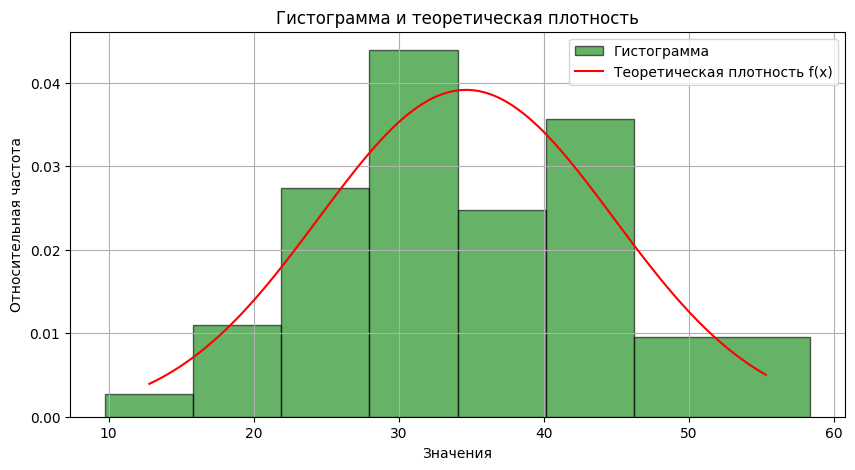

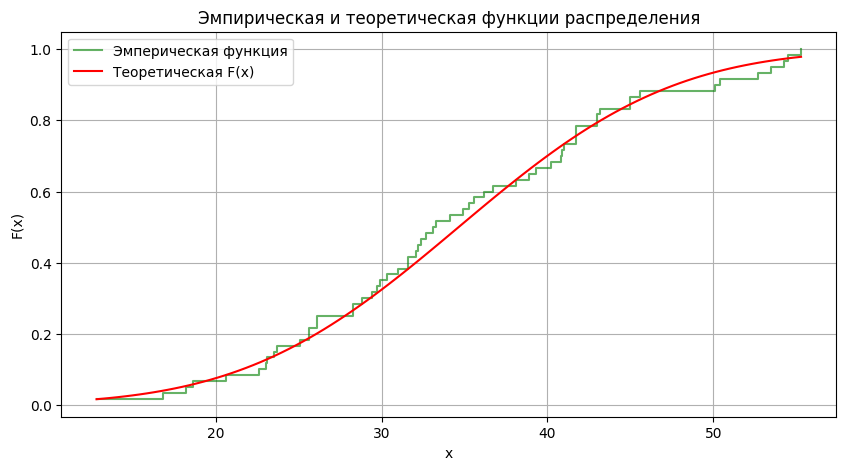

In [22]:
# Пункт 8: Построение теоретических f(x) и F(x) на фоне гистограммы и эмпирической функции

x = np.linspace(np.min(variation_list), np.max(variation_list), 100)
f_x = stats.norm.pdf(x, mu, sigma) # Теоретическая плотность
F_x = stats.norm.cdf(x, mu, sigma) # Теоретическая функция распределения
# Гистограмма с теоретической плотностью
plt.figure(figsize=(10, 5))
plt.hist(variation_list, bins=bin_edges, density=True, alpha=0.6, color='green', edgecolor='black', label='Гистограмма')
plt.plot(x, f_x, 'r-', label='Теоретическая плотность f(x)')
plt.title('Гистограмма и теоретическая плотность')
plt.xlabel('Значения')
plt.ylabel('Относительная частота')
22
plt.legend()
plt.grid(True)
plt.show()
# Эмпирическая и теоретическая функции распределения
plt.figure(figsize=(10, 5))
plt.step(variation_list, empirical_cdf, where='post', alpha=0.6, color='green', label='Эмперическая функция')
plt.plot(x, F_x, 'r-', label='Теоретическая F(x)')
plt.title('Эмпирическая и теоретическая функции распределения')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
# Пункт 9. Правило "трёх сигма"

lower_bound = mu - 3 * sigma
upper_bound = mu + 3 * sigma

# Считаем, сколько значений попало в диапазон
within_3sigma = [x for x in variation_list if lower_bound <= x <= upper_bound]
percentage_within_3sigma = len(within_3sigma) / n * 100

# Результаты
three_sigma_results = {
    "Нижняя граница": lower_bound,
    "Верхняя граница": upper_bound,
    "Количество значений в пределах трёх сигма": len(within_3sigma),
    "Процент значений в пределах трёх сигма": round(percentage_within_3sigma, 2)
}

sigma_df = pd.DataFrame(three_sigma_results.items(), columns=["Показатель", "Значение"])
sigma_df

,Показатель,Значение
0,Нижняя граница,4.078714
1,Верхняя граница,65.214619
2,Количество значений в пределах трёх сигма,60.000000
3,Процент значений в пределах трёх сигма,100.000000


In [24]:
# Пункт 10. Пирсон

print("Исходные интервалы и частоты:")
for i in range(len(frequencies)):
    print(f"  {bin_edges[i]:6.2f} – {bin_edges[i+1]:6.2f} : {frequencies[i]}")

P = norm.cdf(bin_edges[1:], mu, sigma) - norm.cdf(bin_edges[:-1], mu, sigma)
E = P * n

new_edges = [bin_edges[0]]
new_obs = []
new_exp = []
cum_o = cum_e = 0.0

for i in range(len(frequencies)):
    cum_o += frequencies[i]
    cum_e += E[i]
    if cum_e >= 5:
        new_obs.append(cum_o)
        new_exp.append(cum_e)
        new_edges.append(bin_edges[i+1])
        cum_o = cum_e = 0.0

if cum_e > 0:
    new_obs[-1] += cum_o
    new_exp[-1] += cum_e

new_obs = np.array(new_obs)
new_exp = np.array(new_exp)

new_exp = new_exp / new_exp.sum() * n

diff2 = (new_obs - new_exp)**2
chi2_parts = diff2 / new_exp

intervals = [f"{new_edges[i]:.1f}–{new_edges[i+1]:.1f}" for i in range(len(new_obs))]
chi2_df = pd.DataFrame({
    "Интервал":            intervals,
    "ni (набл.)":          new_obs,
    "npi (ожид.)":         np.round(new_exp, 2),
    "(ni–npi)²":           np.round(diff2, 4),
    "((ni–npi)²)/npi":     np.round(chi2_parts, 4)
})

chi2_df.loc["Σ"] = [
    "Σ",
    new_obs.sum(),
    np.round(new_exp.sum(), 2),
    np.round(diff2.sum(), 4),
    np.round(chi2_parts.sum(), 4)
]

chi2_stat   = chi2_parts.sum()
df          = len(new_obs) - 1 - 2
crit_value  = chi2.ppf(0.95, df)
p_value     = 1 - chi2.cdf(chi2_stat, df)

print("\nРезультаты χ²‑теста:")
print(f"  χ²_stat   = {chi2_stat:.2f}")
print(f"  df        = {df}")
print(f"  χ²_0.05   = {crit_value:.2f}")
print(f"  p-value   = {p_value:.4f}")
print("  Нулевая гипотеза о нормальности", "не отвергается" if chi2_stat <= crit_value else "отвергается")

print("\nТаблица χ²‑теста:")
chi2_df


Исходные интервалы и частоты:
    9.76 –  15.84 : 1
   15.84 –  21.91 : 4
   21.91 –  27.98 : 10
   27.98 –  34.05 : 16
   34.05 –  40.12 : 9
   40.12 –  46.19 : 13
   46.19 –  58.34 : 7

Результаты χ²‑теста:
  χ²_stat   = 3.23
  df        = 3
  χ²_0.05   = 7.81
  p-value   = 0.3570
  Нулевая гипотеза о нормальности не отвергается

Таблица χ²‑теста:


,Интервал,ni (набл.),npi (ожид.),(ni–npi)²,((ni–npi)²)/npi
0,9.8–21.9,5.0,6.00,1.0036,0.1672
1,21.9–28.0,10.0,9.21,0.6256,0.0679
2,28.0–34.0,16.0,13.45,6.5174,0.4847
3,34.0–40.1,9.0,13.91,24.1118,1.7334
4,40.1–46.2,13.0,10.19,7.8726,0.7723
5,46.2–58.3,7.0,7.24,0.0564,0.0078
Σ,Σ,60.0,60.00,40.1875,3.2332


In [25]:
# Колмогоров

F_theoretical = norm.cdf((variation_list - mu) / sigma)

D_plus = np.abs(empirical_cdf - F_theoretical)
F_n_prev = np.concatenate([[0], empirical_cdf[:-1]])
D_minus = np.abs(F_theoretical - F_n_prev)


D = np.max(np.concatenate([D_plus, D_minus]))
scaled_stat = np.sqrt(n) * D

t_crit = 1.3581

rows = []
for i in range(n):
    rows.append({
        'x_i': variation_list[i],
        'F(x_i)': F_theoretical[i],
        'F_n(x_i^-)': F_n_prev[i],
        'F_n(x_i)': empirical_cdf[i],
        '|∆⁻|': np.abs(F_theoretical[i] - F_n_prev[i]),
        '|∆⁺|': np.abs(empirical_cdf[i] - F_theoretical[i])
    })

df = pd.DataFrame(rows)
print(f"D               = {D:.4f}")
print(f"√n·D            = {scaled_stat:.4f}")
print(f"Критическое t*  = {t_crit:.4f}")
if scaled_stat > t_crit:
    print("√n·D > t*: отвергаем H₀")
else:
    print("√n·D ≤ t*: гипотеза H₀ подтверждена")
df

D               = 0.0692
√n·D            = 0.5363
Критическое t*  = 1.3581
√n·D ≤ t*: гипотеза H₀ подтверждена


,x_i,F(x_i),F_n(x_i^-),F_n(x_i),|∆⁻|,|∆⁺|
0,12.8,0.016013,0.000000,0.016667,0.016013,0.000653
1,16.8,0.039929,0.016667,0.033333,0.023263,0.006596
2,18.2,0.053252,0.033333,0.050000,0.019919,0.003252
3,18.6,0.057645,0.050000,0.066667,0.007645,0.009021
4,20.6,0.084014,0.066667,0.083333,0.017347,0.000681
5,22.6,0.118547,0.083333,0.100000,0.035213,0.018547
6,23.0,0.126514,0.100000,0.116667,0.026514,0.009847
7,23.1,0.128562,0.116667,0.133333,0.011896,0.004771
8,23.5,0.136987,0.133333,0.150000,0.003654,0.013013
9,23.7,0.141338,0.150000,0.166667,0.008662,0.025329


In [28]:
# Пункт 11

alpha = 0.05  # уровень значимости
df = n - 1  # степени свободы

t_crit = stats.t.ppf(1 - alpha / 2, df)
margin_error = t_crit * std / np.sqrt(n)
ci_mean = (mean - margin_error, mean + margin_error)

chi2_lower = stats.chi2.ppf(alpha / 2, df)
chi2_upper = stats.chi2.ppf(1 - alpha / 2, df)
ci_std = (
    np.sqrt((df * std**2) / chi2_upper),
    np.sqrt((df * std**2) / chi2_lower)
)

# Вывод
print(f"Доверительный интервал для среднего: [{ci_mean[0]:.2f}; {ci_mean[1]:.2f}]")
print(f"Доверительный интервал для стандартного отклонения: [{ci_std[0]:.2f}; {ci_std[1]:.2f}]")
chi2_upper

Доверительный интервал для среднего: [32.01; 37.28]
Доверительный интервал для стандартного отклонения: [8.64; 12.43]


np.float64(82.1174059402383)